#### **1. Import libreries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

#### **2. Data calling**

In [37]:
#identify the current working directory
path = os.getcwd()
path_file = os.path.join(path, "Data","car_details_v4.csv")

data = pd.read_csv(path_file)
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


#### **3. Data describing**

In [59]:
#Shape of the data
data.shape

(2059, 20)

In [47]:
#Describir los datos mediante estadística descriptiva
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2059.000000,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1702.991696,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2419.880635,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,49.000000,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,484.999000,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,825.000000,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1925.000000,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,35000.000000,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


#### **4. Modification data is essential for a good understanding of the data.**

In [128]:
data_ = data.copy()

#Modificar los precios de "Price" a miles
data_["Price"] = data["Price"]/1000

#Modificar los Kilometers de "KM" a miles
data_["Kilometer"] = data["Kilometer"]/1000

#Modificar el año a formato fecha
data_["Year"] = pd.to_datetime(data["Year"], utc=False, format="%Y").dt.year

#Engine Power a formato numérico
data_["Engine"] = data["Engine"].str.split().str[0]

In [129]:
data_.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,0.505,2017,87.15,Petrol,Manual,Pune,Grey,First,Corporate,1198,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


In [ ]:
#Describir los datos modificador mediante estadística descriptiva
data_.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2059.000000,2059.000000,2059.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992,2016.425449,54.224714,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881,3.363564,57.361721,442.458507,135.265825,136.073956,0.822170,15.110198
min,0.049000,1988.000000,0.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,0.484999,2014.000000,29.000000,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,0.825000,2017.000000,50.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000,2019.000000,72.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,35.000000,2022.000000,2000.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


#### **5. Análisis univariado de las variables de interés**

##### **5.1 Análisis univariado del precio**

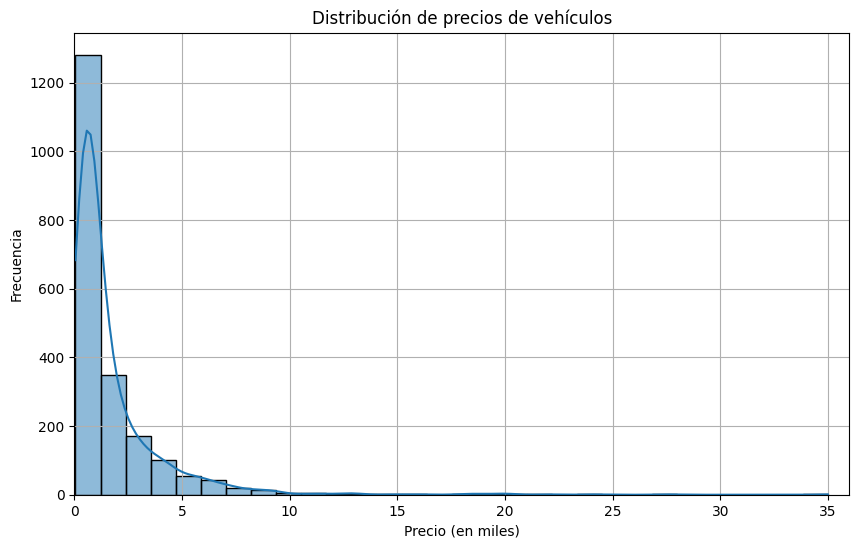

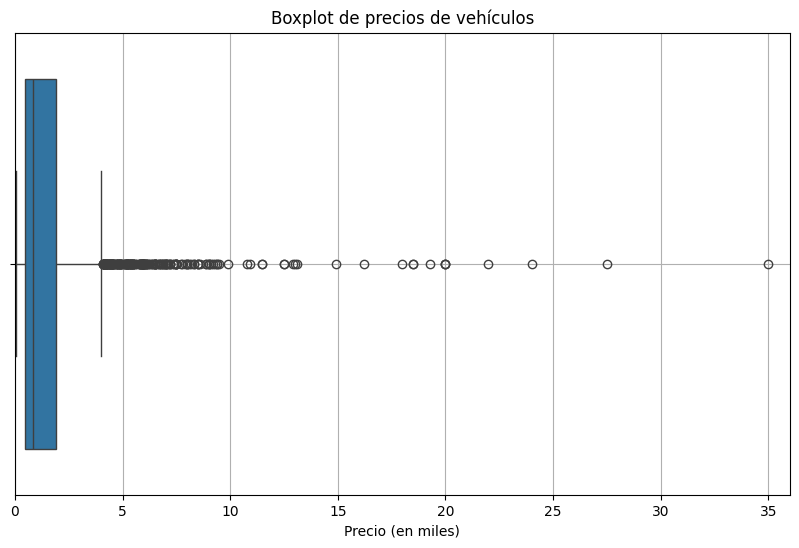

In [100]:
bin_max = 36

#Análisis de precios
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Price", bins=30, kde=True)
plt.title("Distribución de precios de vehículos")
plt.xlabel("Precio (en miles)")
plt.ylabel("Frecuencia")
plt.xlim(0, bin_max)
plt.grid()
plt.show()

#Box plot de precios
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Price")
plt.title("Boxplot de precios de vehículos")
plt.xlabel("Precio (en miles)")
plt.xlim(0, bin_max)
plt.grid()
plt.show()

##### **5.2 Análisis univariado del año**

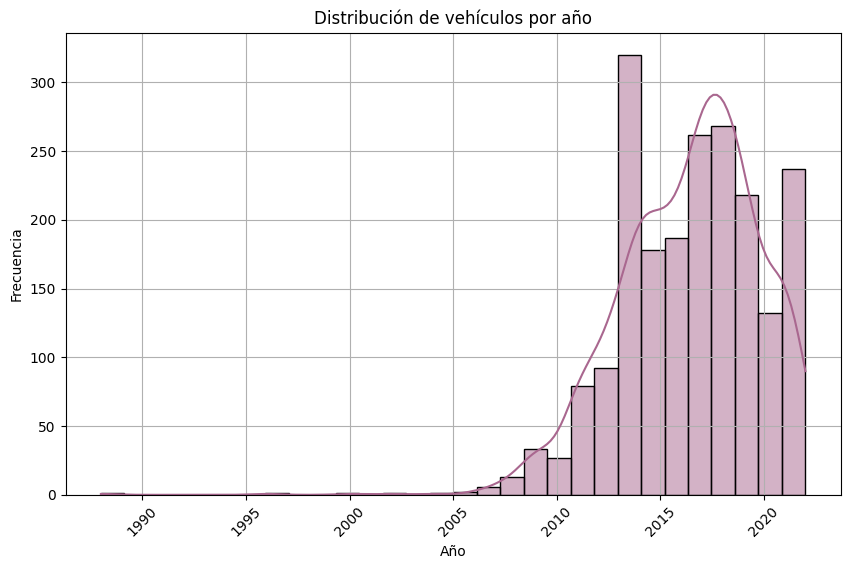

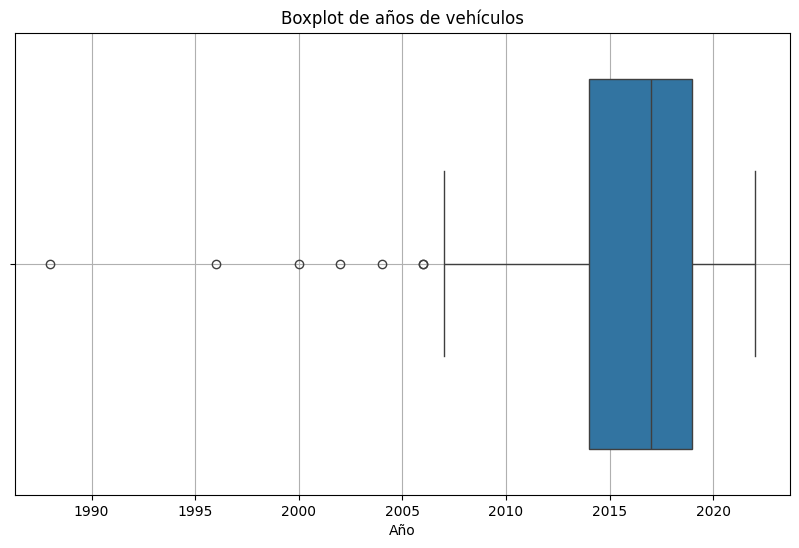

In [110]:
#Histplot de años
plt.figure(figsize=(10,6))
cubehelix = sns.cubehelix_palette(as_cmap=True)
sns.histplot(data=data_, x="Year", bins=30, kde=True, color=cubehelix(0.5))
plt.title("Distribución de vehículos por año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Boxplot de años
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Year")
plt.title("Boxplot de años de vehículos")
plt.xlabel("Año")
plt.grid()
plt.show()

##### **5.3 Análisis univariado de los kilómetros recorridos**

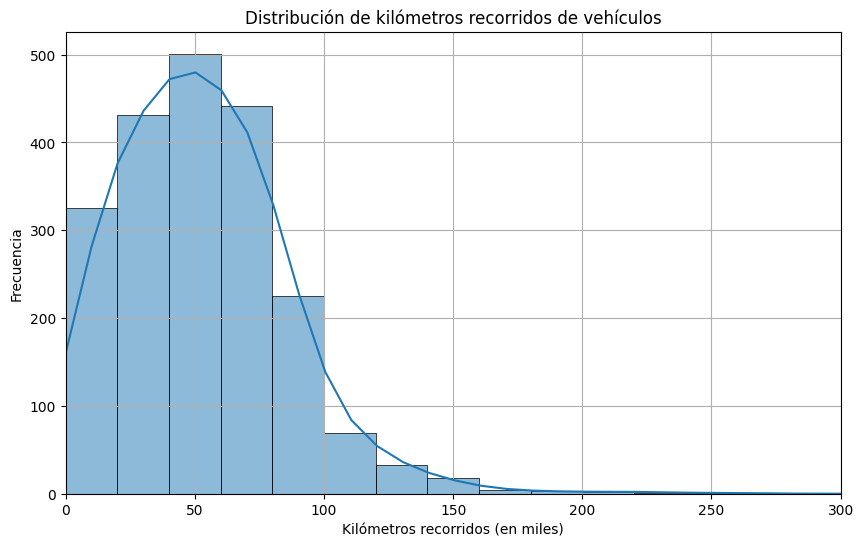

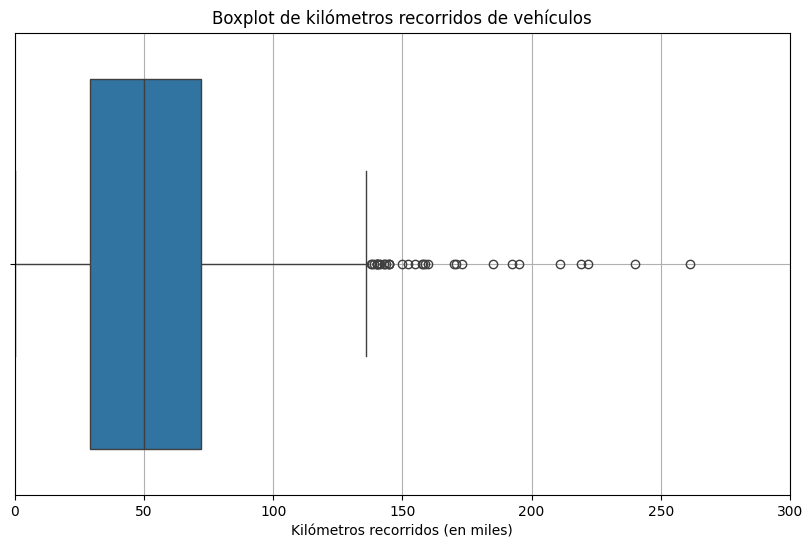

In [106]:
#Análisis univariado de los kilómetros recorridos
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Kilometer", bins=100, kde=True)
plt.title("Distribución de kilómetros recorridos de vehículos")
plt.xlabel("Kilómetros recorridos (en miles)")
plt.ylabel("Frecuencia")
plt.xlim(0, 300)
plt.grid()
plt.show()

#Box plot de kilómetros recorridos
plt.figure(figsize=(10,6))
sns.boxplot(data=data_, x="Kilometer")
plt.title("Boxplot de kilómetros recorridos de vehículos")
plt.xlabel("Kilómetros recorridos (en miles)")
plt.xlim(0, 300)
plt.grid()
plt.show()

##### 5.4 **5.3 Análisis univariado de los Engine**

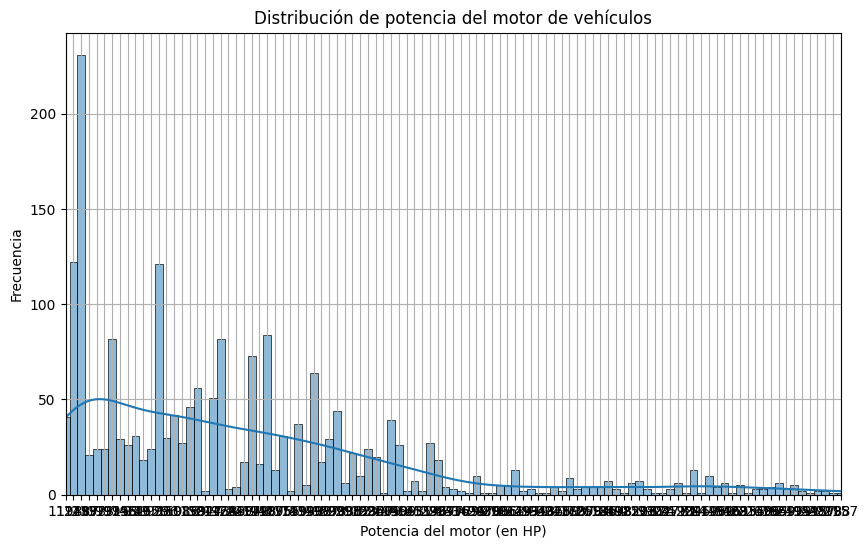

In [ ]:
#Create a new interval frequency table of Engine



#Análisis univariado de Engine
plt.figure(figsize=(10,6))
sns.histplot(data=data_, x="Engine", bins=1, kde=True)
plt.title("Distribución de potencia del motor de vehículos")
plt.xlabel("Potencia del motor (en HP)")
plt.ylabel("Frecuencia")
plt.xlim(0, 100)
plt.grid()
plt.show()

Fuel Type
Diesel          50.95
Petrol          45.75
CNG              2.43
Electric         0.34
LPG              0.24
Hybrid           0.15
CNG + CNG        0.05
Petrol + CNG     0.05
Petrol + LPG     0.05
Name: proportion, dtype: float64


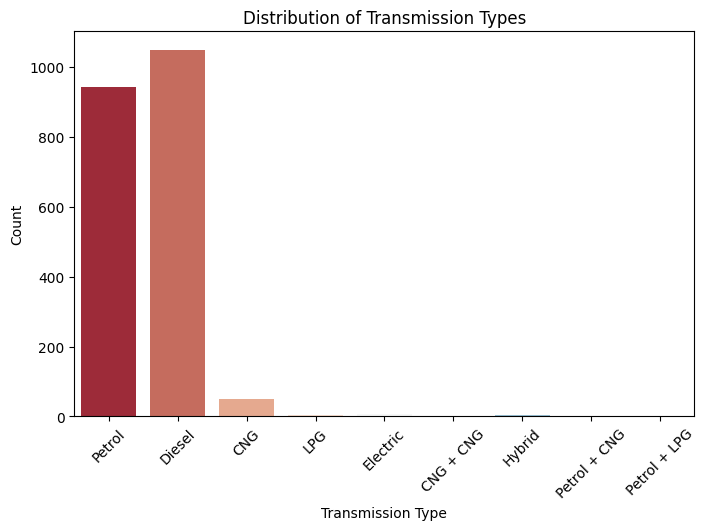

In [74]:
#Con respecto a la variable categórica "combustible" "FuelType", se observa que la mayoría de los vehículos utilizan gasolina (Petrol) como combustible, seguido por diésel (Diesel). Hay una cantidad significativa de vehículos que utilizan gas (CNG) y una pequeña proporción que utiliza electricidad (Electric).
print(data_["Fuel Type"].value_counts(normalize=True).apply(lambda x: x*100).round(2))

#plot the Transmission variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Fuel Type", hue="Fuel Type", palette="RdBu")
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

Transmission
Manual       55.03
Automatic    44.97
Name: proportion, dtype: float64


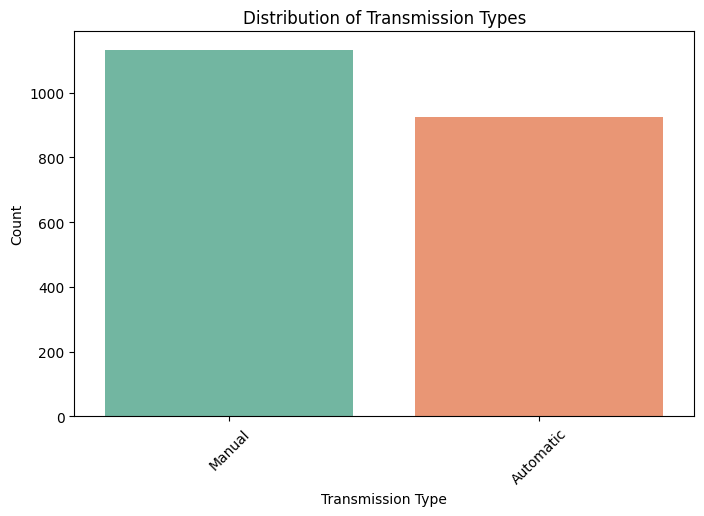

In [76]:
#Con respecto a la variable categórica "transmisión" "Transmission", se observa que la mayoría de los vehículos tienen una transmisión manual (Manual), representando el 70.53% del total. La transmisión automática (Automatic) representa el 29.47% restante. Esto indica que los vehículos con transmisión manual son más comunes en este conjunto de datos.
print(data_["Transmission"].value_counts(normalize=True).apply(lambda x: x*100).round(2))

#plot the Transmission variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Transmission", hue="Transmission", palette="Set2")
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

Owner
First               78.63
Second              18.12
Third                2.04
UnRegistered Car     1.02
Fourth               0.15
4 or More            0.05
Name: proportion, dtype: float64


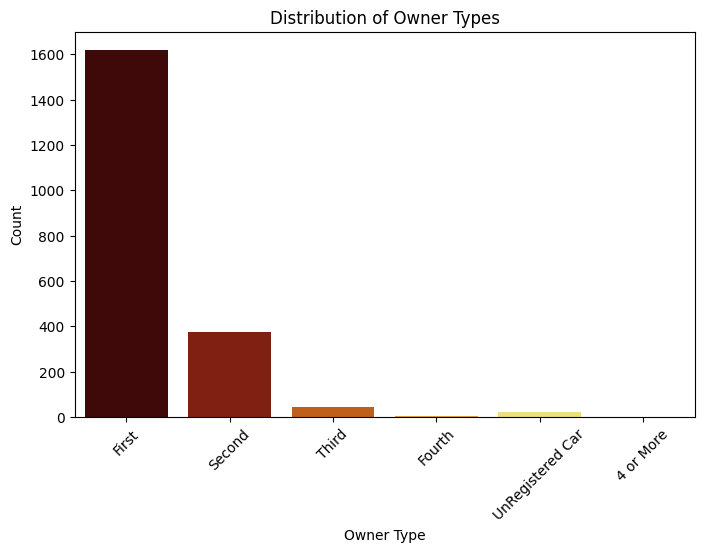

In [81]:
#Con respecto a los datos categóricos OwnerType, se observa que la mayoría de los vehículos son de primer dueño (First Owner), representando el 78.96% del total. Los vehículos de segundo dueño (Second Owner) constituyen el 14.29%, mientras que los de tercer dueño (Third Owner) representan el 4.95%. Los vehículos con más de tres dueños (Fourth & Above Owner) son los menos comunes, representando solo el 1.80% del total. Esto indica que la mayoría de los vehículos en este conjunto de datos tienen un historial de propiedad relativamente corto.
print(data_["Owner"].value_counts(normalize=True).apply(lambda x: x*100).round(2))

#plot the OwnerType variable
plt.figure(figsize=(8,5))
sns.countplot(data=data_, x="Owner", hue="Owner", palette="afmhot")
plt.title("Distribution of Owner Types")
plt.xlabel("Owner Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()